In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
from contract import *
import LSM
import matplotlib.pyplot as plt
from jax_lsm import *

In [2]:
option = Contract(110,25,call_payoff)
prices = simulate_prices(n=100_000)[0]

In [3]:
lsm_euro = LSM_european(prices, option)
bsm_pred = bsm_call(option)[0]

In [4]:
print(f"LSM European: {lsm_euro}")
print(f"BSM European: {bsm_pred}")

LSM European: 0.015048161153323577
BSM European: 75.45568238367272


In [3]:
jax_call = jax_lsm(prices, option)
jax_call

0.07132200490807485

In [4]:
jax_american = LSM_american(prices, option)
jax_american

0.07132200490807485

In [5]:
lsm = LSM.LSM_american(prices, option)
lsm

0.07266091765440162

0.06144779307722424

## Macdonald

In [14]:
option = Contract(40,25,call_payoff)
prices = simulate_prices(initial_price=41,T=25,drift=0.08, volatility=4.8373, n=10_000)[0]

In [15]:
lsm_euro = LSM_european(prices, option, discount_rate=0.08)
bsm_pred = bsm_call(option,rfr=0.08,price=41.0, vol=0.3,)[0]

In [16]:
print(f"LSM European: {lsm_euro}")
print(f"BSM European: {bsm_pred/1.08**25}")

LSM European: 13.718442227991364
BSM European: 5.306114336093512


(array([  2.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   7.,   7.,  13.,
         12.,  17.,  19.,  26.,  36.,  49.,  40.,  63.,  74.,  70.,  80.,
        103., 131., 108., 129., 144., 175., 220., 200., 216., 211., 262.,
        255., 271., 278., 295., 279., 319., 284., 305., 303., 341., 308.,
        316., 292., 312., 268., 229., 257., 245., 229., 200., 199., 192.,
        156., 175., 155., 118., 126., 102., 102.,  80.,  76.,  82.,  45.,
         60.,  50.,  31.,  36.,  32.,  21.,  26.,  22.,  15.,  15.,  10.,
          9.,   4.,   5.,   6.,   6.,   3.,   4.,   1.,   1.,   2.,   2.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([35.4083345 , 35.55390583, 35.69947716, 35.84504849, 35.99061982,
        36.13619115, 36.28176248, 36.42733381, 36.57290514, 36.71847647,
        36.8640478 , 37.00961913, 37.15519046, 37.30076179, 37.44633312,
        37.59190445, 37.73747578, 37.88304711, 38.02861845, 38.17418978,
        38.31976111, 38.46

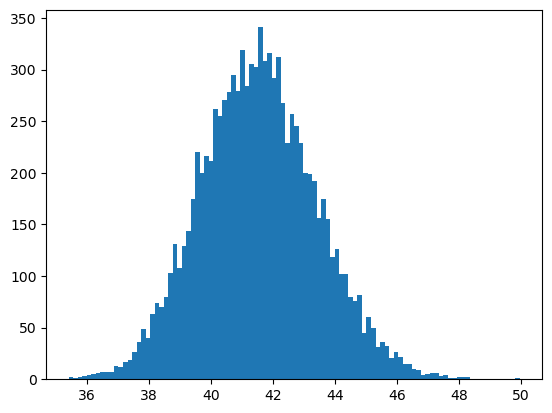

In [10]:
final_prices = prices[:,-1]
plt.hist(final_prices, bins=100)

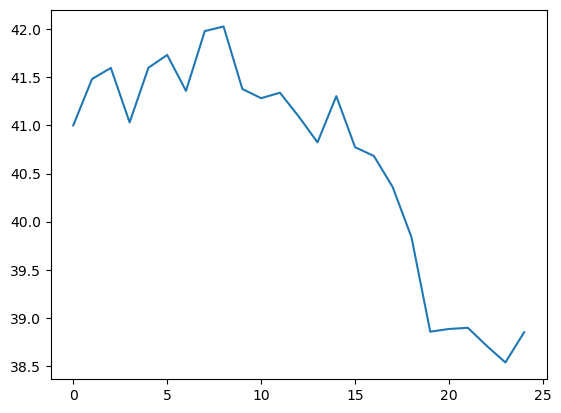

In [9]:
plt.plot(prices[:5][0])